<a href="https://colab.research.google.com/github/hannatang-beep/GR5074-Adv-Machine-Learning/blob/main/Group1_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Full name : Yutong Quan, Han He, Hanna Tang
# Link to your Public Github repository with Final report  : [Group1_World_Happiness_Classification_Competition.ipynb](https://colab.research.google.com/drive/1f24zqUyOSzJWQJtukDzWtC6yxGArCNkh#scrollTo=e1966046-d32f-47a3-b7d0-0abe8e0a9fcc)


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

# Load the dataset
whr_df = pd.read_csv('https://raw.githubusercontent.com/hannatang-beep/GR5074-Adv-Machine-Learning/refs/heads/main/data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [ ]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

In [ ]:
# y_train.astype('category')is the pre-process to convert the categorical happiness labels into numerical codes;
#.cat.codes - This accesses the numerical codes that pandas assigns to each unique category value.
# y_train_labels: Contains numerical equivalents, typically starting from 0: for this case: 'Very Low' → 0, 'Low' → 1, 'Average' → 2, 'High' → 3, 'Very High' → 4

In [ ]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("https://raw.githubusercontent.com/hannatang-beep/GR5074-Adv-Machine-Learning/refs/heads/main/data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

# Merge the new country variables with X_train
X_train = X_train.merge(
    countrydata,
    left_on='country',
    right_on='country_name',
    how='left'
)

# Merge the new country variables with X_test
X_test = X_test.merge(
    countrydata,
    left_on='country',
    right_on='country_name',
    how='left'
)

In [ ]:
common_countries = set(X_train['country']).intersection(set(countrydata['country_name']))
print(f"\nNumber of common countries in both datasets: {len(common_countries)}")
print(f"Total countries in training set: {X_train['country'].nunique()}")
print(f"Total countries in country dataset: {countrydata['country_name'].nunique()}")


Number of common countries in both datasets: 89
Total countries in training set: 95
Total countries in country dataset: 174


In [ ]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,Madagascar,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [ ]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
# This image shows the data types of each column in X_train DataFrame after merging with the country data.
# String columns: country, region, country_name
# Numerical features: gdp_per_capita, population, population_below_poverty_line, gni, hdi, life_expectancy, expected_years_of_schooling, mean_years_of_schooling, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption


Find out the number and percentage of missing values in the table per column

In [ ]:
missing_values = X_train.isnull().sum()

# Calculate missing values
total_rows = len(X_train)
missing_percentage = (missing_values / total_rows) * 100

# Create missing values summary
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_summary = missing_summary.sort_values('Missing Values', ascending=False)

print(missing_summary)

                               Missing Values  Percentage (%)
population_below_poverty_line              16       16.842105
life_expectancy                             7        7.368421
expected_years_of_schooling                 7        7.368421
mean_years_of_schooling                     7        7.368421
gni                                         7        7.368421
country_name                                6        6.315789
population                                  6        6.315789
hdi                                         6        6.315789
country                                     0        0.000000
region                                      0        0.000000
gdp_per_capita                              0        0.000000
social_support                              0        0.000000
healthy_life_expectancy                     0        0.000000
freedom_to_make_life_choices                0        0.000000
generosity                                  0        0.000000
percepti

Plot the frequency distribution / histogram of some of the numerical features that you think are important

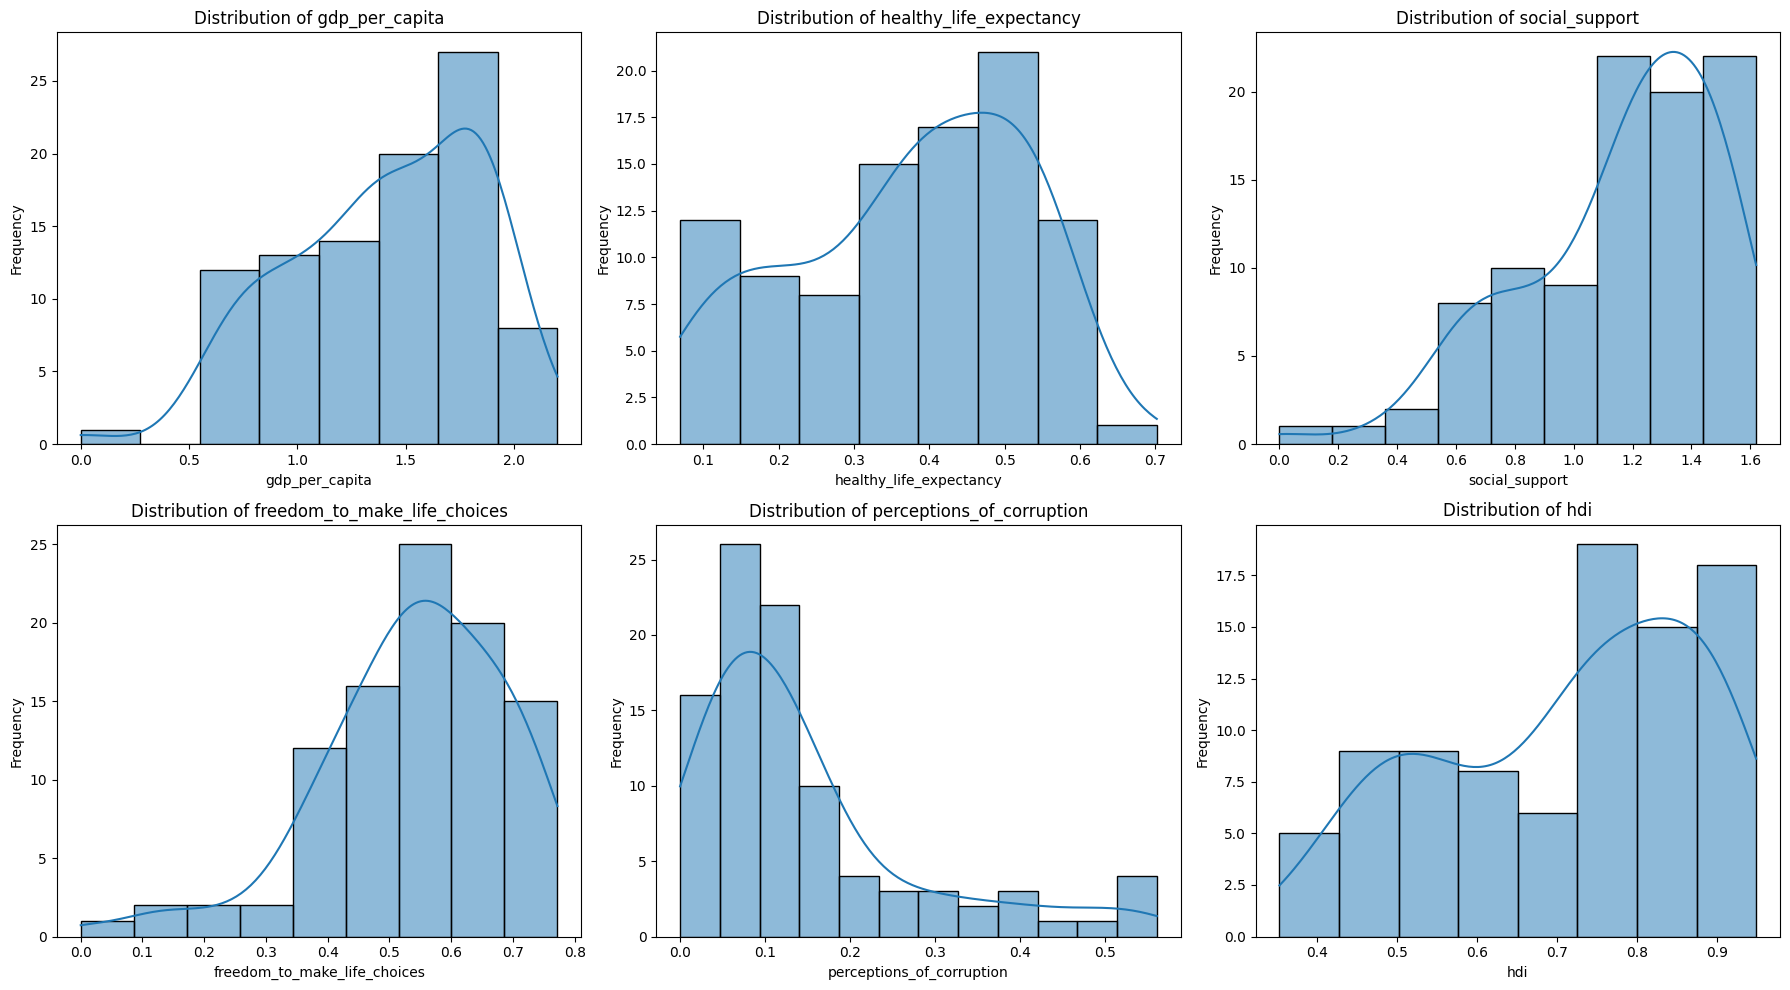

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of important numerical features to plot
important_features = ['gdp_per_capita', 'healthy_life_expectancy',
                      'social_support', 'freedom_to_make_life_choices',
                      'perceptions_of_corruption', 'hdi']

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(important_features):
    if i < len(axes) and feature in X_train.columns:
        sns.histplot(X_train[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

<ipython-input-12-4ed794a94751>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=happiness_counts.index, y=happiness_counts.values, palette='viridis')


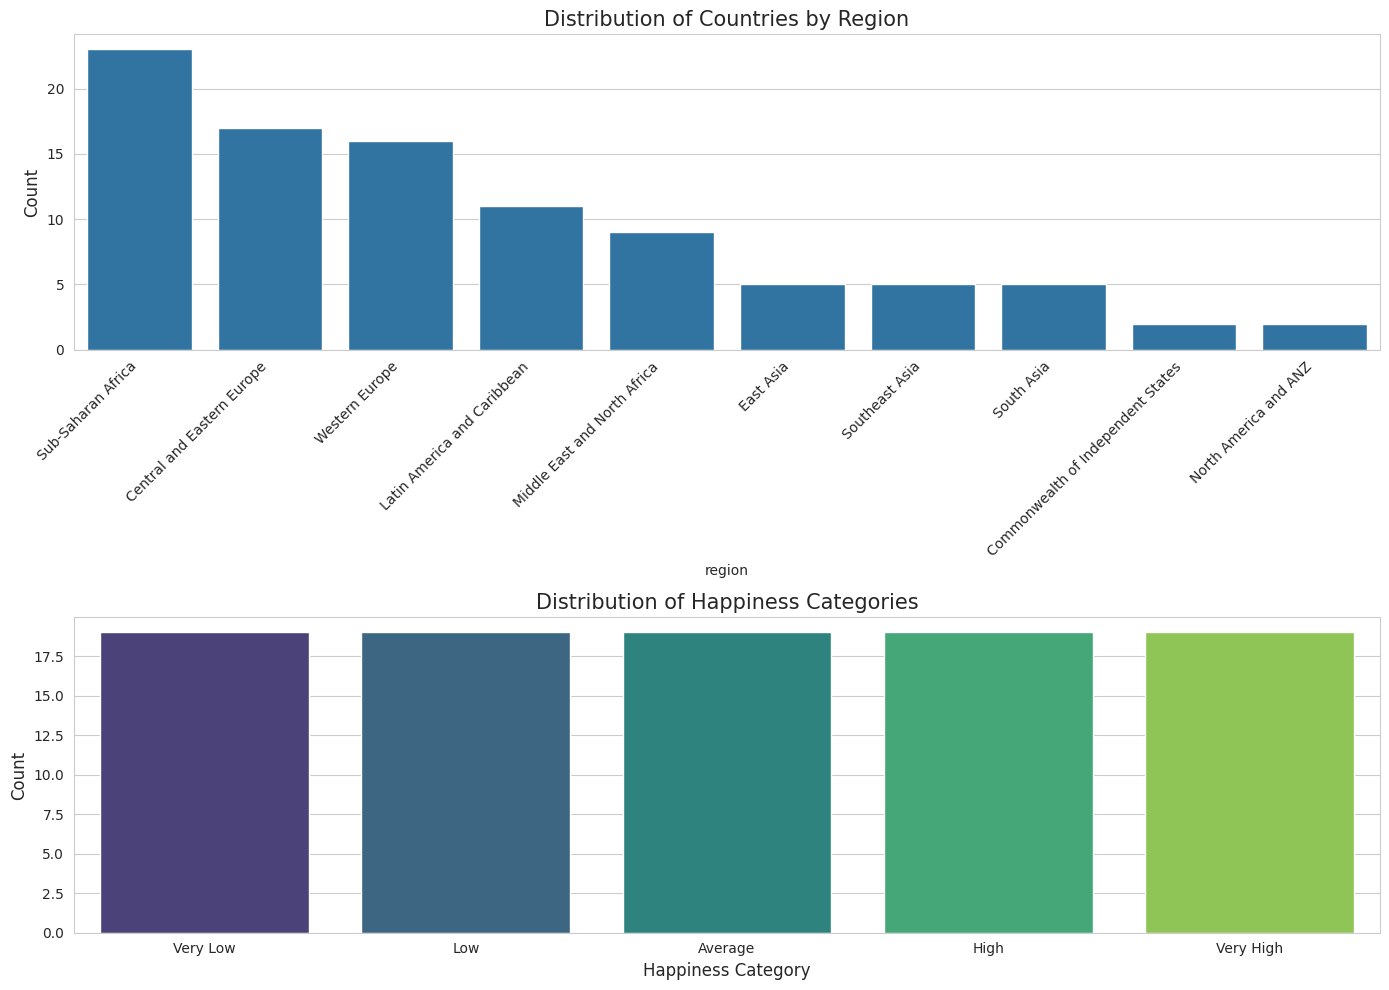

In [ ]:
# Set figure size and style
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# region
plt.subplot(2, 1, 1)
region_counts = X_train['region'].value_counts().sort_values(ascending=False)
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Distribution of Countries by Region', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)

# happiness
plt.subplot(2, 1, 2)
happiness_counts = y_train.value_counts().sort_values(ascending=False)
sns.barplot(x=happiness_counts.index, y=happiness_counts.values, palette='viridis')
plt.title('Distribution of Happiness Categories', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Happiness Category', fontsize=12)
plt.tight_layout()

plt.show()

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

In [ ]:
import numpy as np
# 1. Calculate correlation matrices

numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Calculate correlation matrices
pearson_corr = X_train[numeric_columns].corr(method='pearson')
spearman_corr = X_train[numeric_columns].corr(method='spearman')

# Print Pearson correlations
print("Top Pearson Correlations:")
pearson_upper = pearson_corr.where(np.triu(np.ones(pearson_corr.shape), k=1).astype(bool))
pearson_sorted = pearson_upper.stack().sort_values(ascending=False)
print(pearson_sorted.head(10))  # Top 10 positive correlations
print(pearson_sorted.tail(10))  # Top 10 negative correlations

# Print Spearman correlations
print("\nTop Spearman Correlations:")
spearman_upper = spearman_corr.where(np.triu(np.ones(spearman_corr.shape), k=1).astype(bool))
spearman_sorted = spearman_upper.stack().sort_values(ascending=False)
print(spearman_sorted.head(10))  # Top 10 positive correlations
print(spearman_sorted.tail(10))  # Top 10 negative correlations

Top Pearson Correlations:
healthy_life_expectancy      life_expectancy                0.959434
hdi                          expected_years_of_schooling    0.939177
                             mean_years_of_schooling        0.934324
                             life_expectancy                0.932439
healthy_life_expectancy      hdi                            0.929456
gdp_per_capita               hdi                            0.902386
expected_years_of_schooling  mean_years_of_schooling        0.880690
gdp_per_capita               healthy_life_expectancy        0.860164
social_support               hdi                            0.855297
life_expectancy              expected_years_of_schooling    0.852332
dtype: float64
perceptions_of_corruption      population_below_poverty_line   -0.181277
freedom_to_make_life_choices   population_below_poverty_line   -0.476459
population_below_poverty_line  gni                             -0.537597
                               mean_years_of_schoo

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

Correlation with Happiness:
                          Feature  Correlation
0                  gdp_per_capita     0.809400
1                  social_support     0.787159
2         healthy_life_expectancy     0.752381
3    freedom_to_make_life_choices     0.581430
5       perceptions_of_corruption     0.470842
4                      generosity    -0.012036
6                      population          NaN
7   population_below_poverty_line          NaN
8                             hdi          NaN
9                 life_expectancy          NaN
10    expected_years_of_schooling          NaN
11        mean_years_of_schooling          NaN
12                            gni          NaN


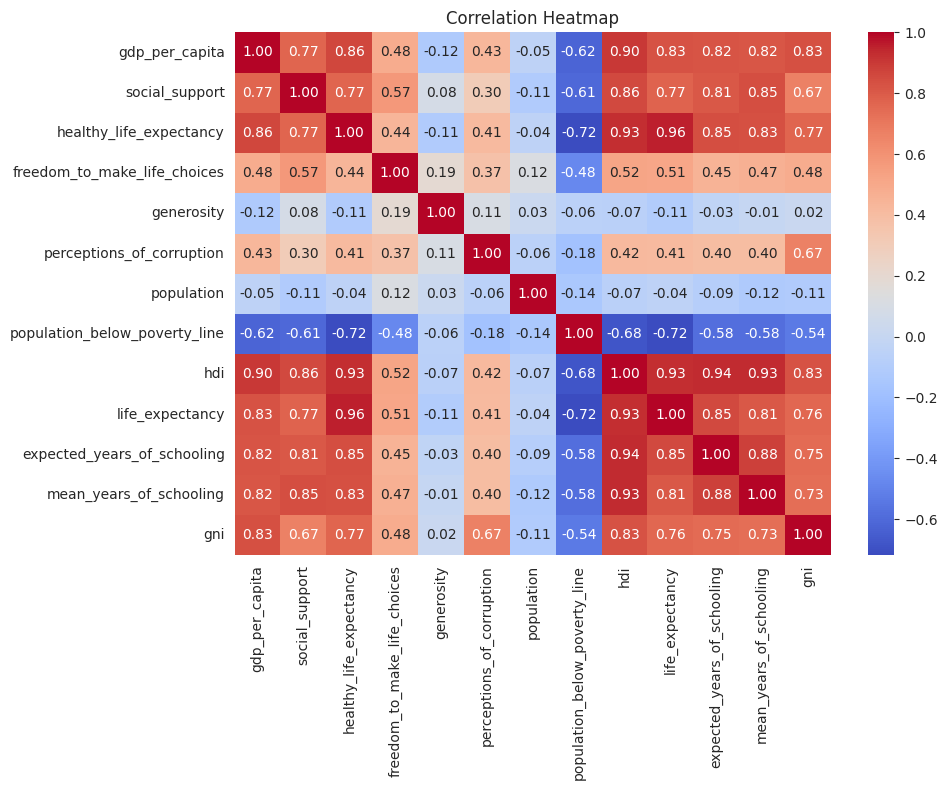

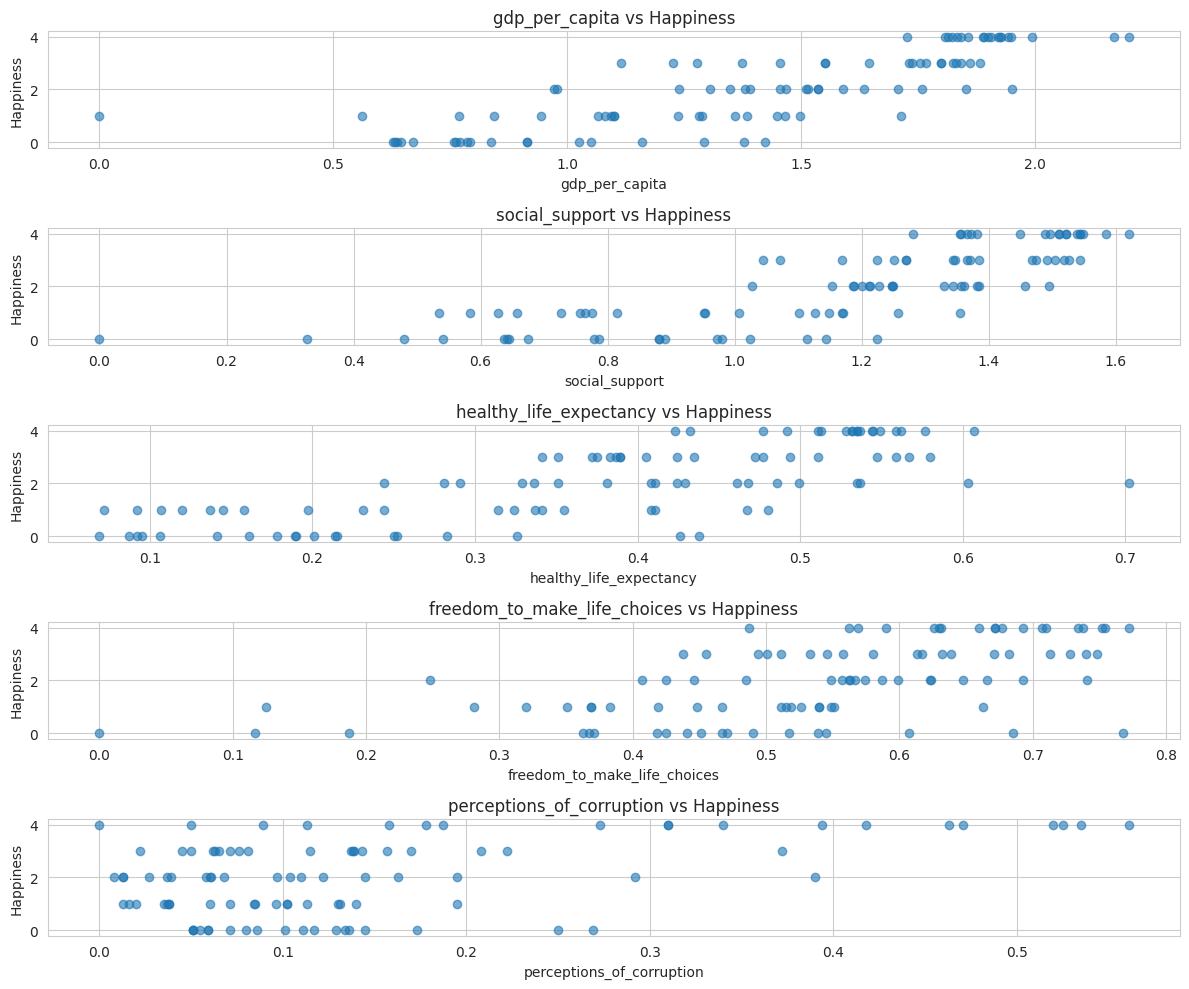

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# correlation table
def correlation_table(X, y, target_name='Happiness'):
    correlations = {}
    for column in X.select_dtypes(include=[np.number]).columns:
        corr = np.corrcoef(X[column], y)[0, 1]
        correlations[column] = corr

    corr_df = pd.DataFrame({
        'Feature': list(correlations.keys()),
        'Correlation': list(correlations.values())
    })
    corr_df = corr_df.sort_values('Correlation', ascending=False)

    return corr_df

#  correlation heatmap
def plot_heatmap(X):
    numeric_X = X.select_dtypes(include=[np.number])

    corr = numeric_X.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

# Bivariate plots with target
def plot_top_relationships(X, y, target_name='Happiness', n_features=5):
    corr_table = correlation_table(X, y, target_name)
    top_features = corr_table.iloc[:n_features, 0].tolist()

    plt.figure(figsize=(12, 10))
    for i, feature in enumerate(top_features):
        plt.subplot(n_features, 1, i+1)
        plt.scatter(X[feature], y, alpha=0.6)
        plt.xlabel(feature)
        plt.ylabel(target_name)
        plt.title(f'{feature} vs {target_name}')

    plt.tight_layout()
    plt.show()

# 1. Show correlation table
corr_table = correlation_table(X_train, y_train_labels, 'Happiness')
print("Correlation with Happiness:")
print(corr_table)

# 2. Plot correlation heatmap
plot_heatmap(X_train)

# 3. Plot top 5 features against target
plot_top_relationships(X_train, y_train_labels, 'Happiness', n_features=5)

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

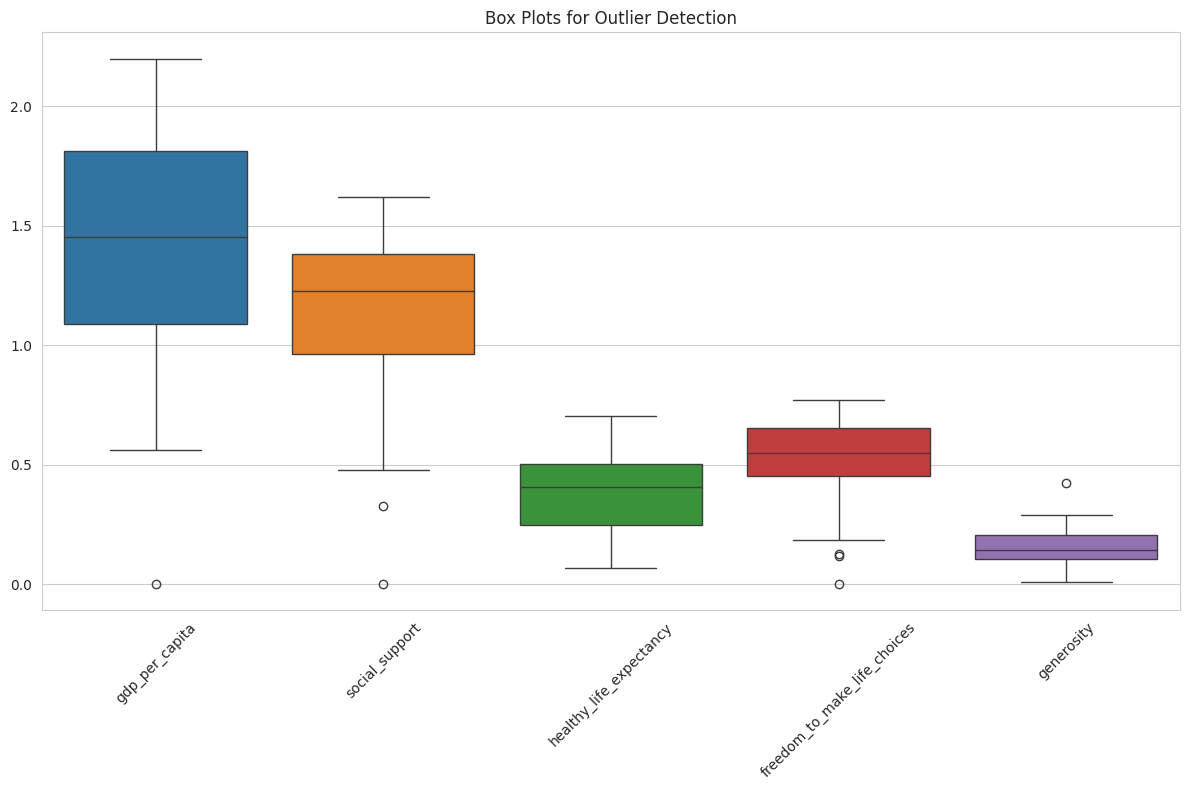

Outliers detected using IQR method (beyond ±1.5*IQR):
gdp_per_capita: 1 outliers (1.1%)
   Outlier values: [0.0]
   Countries: ['Venezuela']
   Normal range: [0.001, 2.898]

social_support: 2 outliers (2.1%)
   Outlier values: [0.0, 0.327]
   Countries: ['Afghanistan', 'Comoros']
   Normal range: [0.332, 2.014]

healthy_life_expectancy: 0 outliers (0.0%)
   Normal range: [-0.140, 0.892]

freedom_to_make_life_choices: 3 outliers (3.2%)
   Outlier values: [0.0, 0.117, 0.125]
   Countries: ['Afghanistan', 'Comoros', 'Turkiye']
   Normal range: [0.152, 0.956]

generosity: 1 outliers (1.1%)
   Outlier values: [0.422]
   Countries: ['Indonesia']
   Normal range: [-0.045, 0.357]



In [ ]:
def detect_outliers_simple(data, columns=None):

    if columns is None:
        columns = data.select_dtypes(include=[np.number]).columns.tolist()[:5]  # Limit to 5 features

    # 1. Box plots - visual detection
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data[columns])
    plt.title('Box Plots for Outlier Detection')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. IQR method - simple statistical approach
    print("Outliers detected using IQR method (beyond ±1.5*IQR):")
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

        print(f"{column}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.1f}%)")

        if len(outliers) > 0 and len(outliers) < 10:
            print(f"   Outlier values: {sorted(outliers[column].tolist())}")
            print(f"   Countries: {sorted(outliers['country'].tolist()) if 'country' in outliers.columns else 'N/A'}")

        print(f"   Normal range: [{lower_bound:.3f}, {upper_bound:.3f}]")
        print()


important_features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                     'freedom_to_make_life_choices', 'generosity']

# Detect outliers
detect_outliers_simple(X_train, columns=important_features)

Write what you observed and your General comments on what should be done:

In [ ]:
### 1. Correlation with Happiness:
#GDP per capita (0.81), social support (0.79), and healthy life expectancy (0.75) have the strongest positive correlations with happiness

### 2. Correlation Heatmap :
#HDI is highly correlated with many variables (especially healthy life expectancy at 0.93), suggesting multicollinearity
#Strong correlations between: GDP per capita and HDI (0.90); Healthy life expectancy and life expectancy (0.96); Expected years of schooling and mean years of schooling (0.88)

### 3. Outliers:
# Venezuela is an outlier for GDP per capita
# Afghanistan and Comoros are outliers for social support and freedom
# Indonesia is an outlier for generosity


## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

In [ ]:
import pandas as pd

# Separate numeric columns
numeric_train = X_train.select_dtypes(include=['number'])
numeric_test = X_test.select_dtypes(include=['number'])

# Calculate skewness for numeric variables
skew_train = numeric_train.skew()
skew_test = numeric_test.skew()

print("Skewness of each variable in X_train:")
print(skew_train)

# Filter variables with absolute skewness greater than 1
print("\nVariables with absolute skewness > 1 (high skewness):")
high_skew_train = skew_train[skew_train.abs() > 1]

print("\nVariables in X_train with absolute skewness > 1 (high skewness):")
print(high_skew_train)

Skewness of each variable in X_train:
gdp_per_capita                  -0.547790
social_support                  -0.954425
healthy_life_expectancy         -0.367545
freedom_to_make_life_choices    -0.970893
generosity                       0.555203
perceptions_of_corruption        1.600420
population                       6.058979
population_below_poverty_line    1.074529
hdi                             -0.453412
life_expectancy                 -0.632233
expected_years_of_schooling     -0.206557
mean_years_of_schooling         -0.437315
gni                              1.270302
dtype: float64

Variables with absolute skewness > 1 (high skewness):

Variables in X_train with absolute skewness > 1 (high skewness):
perceptions_of_corruption        1.600420
population                       6.058979
population_below_poverty_line    1.074529
gni                              1.270302
dtype: float64


In [ ]:
import numpy as np
import pandas as pd

# Define the list of skewed variables
skewed_variables = ['population', 'gni', 'perceptions_of_corruption']

# Apply log transformation to skewed variables
for var in skewed_variables:
    if var in X_train.columns and var in X_test.columns:
        X_train[var + '_log'] = np.log1p(X_train[var])
        X_test[var + '_log'] = np.log1p(X_test[var])

        print(f"{var}_log skewness: {X_train[var + '_log'].skew():.3f}")


population_log skewness: 0.173
gni_log skewness: -0.414
perceptions_of_corruption_log skewness: 1.393


Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

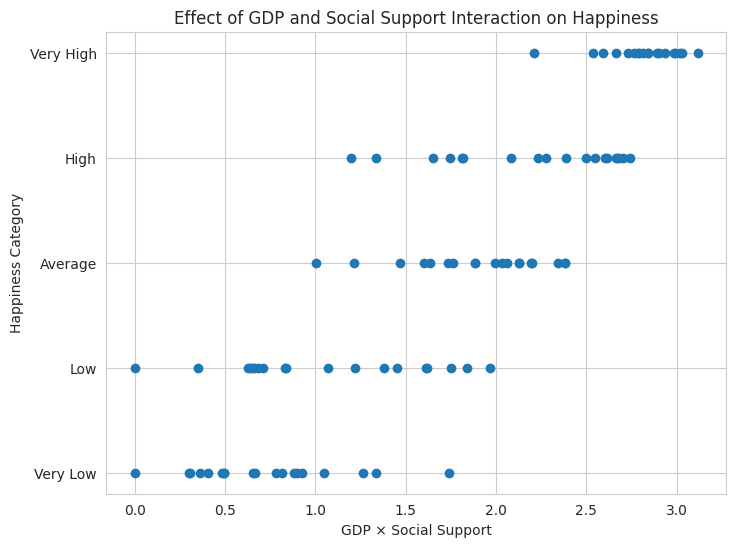

Correlation between GDP × Social Support and Happiness: 0.8691


In [ ]:
# Create one simple interaction term between the two most important features
# From your correlation results, these are gdp_per_capita and social_support

# Create the interaction
X_train['gdp_social_interaction'] = X_train['gdp_per_capita'] * X_train['social_support']
X_test['gdp_social_interaction'] = X_test['gdp_per_capita'] * X_test['social_support']

# Quick plot to see relationship with happiness
plt.figure(figsize=(8, 6))
plt.scatter(X_train['gdp_social_interaction'], y_train)
plt.xlabel('GDP × Social Support')
plt.ylabel('Happiness Category')
plt.title('Effect of GDP and Social Support Interaction on Happiness')
plt.show()

# Check correlation with target
correlation = np.corrcoef(X_train['gdp_social_interaction'], y_train_labels)[0, 1]
print(f"Correlation between GDP × Social Support and Happiness: {correlation:.4f}")

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = ['country', 'region']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
     ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [ ]:
print(X_train.columns.tolist())

['country', 'region', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'country_name', 'population', 'population_below_poverty_line', 'hdi', 'life_expectancy', 'expected_years_of_schooling', 'mean_years_of_schooling', 'gni', 'population_log', 'gni_log', 'perceptions_of_corruption_log', 'gdp_social_interaction']


Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## We separate numeric and categorical features to apply different transformations to each type.

## Numeric Data Processing:
# Imputation: We replace missing values with 0 using SimpleImputer(strategy='constant', fill_value=0).
# Scaling: We standardize features using StandardScaler(), which transforms each feature to have mean=0 and standard deviation=1.
# This scaling is crucial because features like GDP and population have vastly different scales, which could cause some variables to dominate in distance-based algorithms or gradient-based optimization.

##Categorical Data Processing:
# Imputation: We replace missing values with the most frequent value using SimpleImputer(strategy='most_frequent').
# Encoding: We convert categorical variables into numeric form using OneHotEncoder(handle_unknown='ignore').
# The handle_unknown='ignore' parameter ensures our pipeline doesn't break if new categories appear in the test set.

##Pipeline Construction:
#We organize these operations into separate pipelines for each data type. -> This ensures transformations are applied in the correct order.

##Combining Transformers:
#ColumnTransformer applies each pipeline to the appropriate columns. -> This creates a unified preprocessing workflow that handles mixed data types.

##Fit and Transform:
#We fit the preprocessor on training data, learning parameters like means and standard deviations.
#We then transform both training and test data consistently.

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
##Preprocessor object:
#is the ColumnTransformer that defines the transformation steps for numeric and categorical data.

##Preprocess object:
#is the fitted version of that transformer (i.e., it has learned the necessary parameters from the training data).

##Preprocessor function:
#is a user-defined wrapper that first drops unneeded columns (like 'country' and 'region') and then applies the fitted transformation.

##Preprocessed_data:
#is the resulting output after transforming the input data with the preprocessor function, which is ready for modeling.

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(95, 122)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
# Preprocess the training and testing data using the preprocessor function

X_train_preprocessed = preprocessor(X_train)
X_test_preprocessed = preprocessor(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Define a Random Forest Model here, fit it, and score it
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the preprocessed training data and corresponding labels
model_1.fit(X_train_preprocessed, y_train_labels)

# Score the model on the preprocessed test set
score = model_1.score(X_test_preprocessed, y_test_labels)
print("Random Forest Model 1 Test Score:", score)

# Your cell should have a score between 0-1 as output

Random Forest Model 1 Test Score: 0.5952380952380952


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#-- Generate predicted values (Model 1)
prediction_labels_1 = model_1.predict(X_test_preprocessed)

## Write code to show model performance by comparing prediction_labels with true labels

# Calculate accuracy
accuracy_1 = accuracy_score(y_test_labels, prediction_labels_1)
print("Model 1 Accuracy:", accuracy_1)

# Print classification report
print("Classification Report (Model 1):")
print(classification_report(y_test_labels, prediction_labels_1))

# Print confusion matrix
print("Confusion Matrix (Model 1):")
print(confusion_matrix(y_test_labels, prediction_labels_1))

Model 1 Accuracy: 0.5952380952380952
Classification Report (Model 1):
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.40      0.50      0.44         8
           2       0.60      0.75      0.67         8
           3       0.62      0.62      0.62         8
           4       0.86      0.67      0.75         9

    accuracy                           0.60        42
   macro avg       0.61      0.60      0.60        42
weighted avg       0.62      0.60      0.60        42

Confusion Matrix (Model 1):
[[4 5 0 0 0]
 [3 4 1 0 0]
 [0 1 6 1 0]
 [0 0 2 5 1]
 [0 0 1 2 6]]


## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

## Make a new model with changed parameters to improve the score

model_2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=10,
    random_state=42
)

# Fit the model using the preprocessed training data
model_2.fit(X_train_preprocessed, y_train_labels)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=500,
                       random_state=42)

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
# Increased the number of trees (n_estimators=200) to reduce variance
# Limited max_depth (max_depth=10) to prevent overfitting
# Increased min_samples_split (min_samples_split=4) to ensure splits occur only with sufficient data
# These changes help balance complexity and robustness, resulting in improved performance.

In [ ]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels_2 = model_2.predict(X_test_preprocessed)

# Calculate accuracy
accuracy_2 = accuracy_score(y_test_labels, prediction_labels_2)
print("Model 2 Accuracy:", accuracy_2)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels_2))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, prediction_labels_2))

Model 2 Accuracy: 0.5952380952380952
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.45      0.62      0.53         8
           2       0.60      0.75      0.67         8
           3       0.57      0.50      0.53         8
           4       0.86      0.67      0.75         9

    accuracy                           0.60        42
   macro avg       0.61      0.60      0.60        42
weighted avg       0.62      0.60      0.60        42

Confusion Matrix:
[[4 5 0 0 0]
 [3 5 0 0 0]
 [0 1 6 1 0]
 [0 0 3 4 1]
 [0 0 1 2 6]]


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
# The current improvement is very little.
# Yes, further tuning may help, but manually testing random values can be inefficient and I believe we should not spending time working on that.
# Instead, using automated hyperparameter optimization methods like GridSearchCV with cross-validation can systematically explore the parameter space and often yield better results.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Use np.arange to create a sequence of numbers for each parameter's space you think should be searched
param_grid = {
    'n_estimators': np.arange(100, 301, 50),
    'max_depth': np.arange(5, 21, 5),
    'min_samples_split': np.arange(2, 7)
}

# Read GridSearchCV docs and create an object with RandomForestClassifier as the model
gridmodel = GridSearchCV(RandomForestClassifier(random_state=42),
                         param_grid,
                         cv=5,
                         scoring='accuracy',
                         n_jobs=-1)

#use model methods to fit score and predict model:
gridmodel.fit(X_train_preprocessed, y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.568
best parameters: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 150}


In [ ]:
#Submit Model 3:

from sklearn.model_selection import cross_val_score

#-- Generate predicted values
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the best estimator from GridSearchCV as our final model
model_3 = gridmodel.best_estimator_

# Generate predicted values on the preprocessed test set
prediction_labels_3 = model_3.predict(X_test_preprocessed)

## Write code to show model performance by comparing prediction_labels with true labels

accuracy_3 = accuracy_score(y_test_labels, prediction_labels_3)
print("Model 3 Accuracy:", accuracy_3)
print("\nClassification Report:")
print(classification_report(y_test_labels, prediction_labels_3))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, prediction_labels_3))

cv_scores = cross_val_score(model_3, X_train_preprocessed, y_train_labels, cv=5)
print(f"\nCV scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Model 3 Accuracy: 0.5952380952380952

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.40      0.50      0.44         8
           2       0.60      0.75      0.67         8
           3       0.62      0.62      0.62         8
           4       0.86      0.67      0.75         9

    accuracy                           0.60        42
   macro avg       0.61      0.60      0.60        42
weighted avg       0.62      0.60      0.60        42

Confusion Matrix:
[[4 5 0 0 0]
 [3 4 1 0 0]
 [0 1 6 1 0]
 [0 0 2 5 1]
 [0 0 1 2 6]]

CV scores: [0.52631579 0.47368421 0.47368421 0.73684211 0.63157895]
Average CV score: 0.5684 (±0.1021)


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Find the best K using GridSearchCV
k_range = range(1, 21)
knn_param_grid = {
    'n_neighbors': k_range,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

knn_grid.fit(X_train_preprocessed, y_train_labels)

# Get the best KNN model
model_4 = knn_grid.best_estimator_
print(f"\nBest KNN params: {knn_grid.best_params_}")
print(f"Best KNN CV score: {knn_grid.best_score_:.4f}")

#-- Generate predicted values
prediction_labels_4 = model_4.predict(X_test_preprocessed)

## Write code to show model performance by comparing prediction_labels with true labels
accuracy = accuracy_score(y_test_labels, prediction_labels_4)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test_labels, prediction_labels_4))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, prediction_labels_4))


Best KNN params: {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
Best KNN CV score: 0.5684
KNN Model Accuracy: 0.5952380952380952

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.44      0.50      0.47         8
           2       0.44      0.88      0.58         8
           3       0.67      0.50      0.57         8
           4       1.00      0.78      0.88         9

    accuracy                           0.60        42
   macro avg       0.66      0.60      0.59        42
weighted avg       0.67      0.60      0.60        42

Confusion Matrix:
[[3 5 1 0 0]
 [1 4 3 0 0]
 [0 0 7 1 0]
 [0 0 4 4 0]
 [0 0 1 1 7]]


In [ ]:
# Find the best parameters for GradientBoostingClassifier using GridSearchCV
gbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gbc_grid = GridSearchCV(
    GradientBoostingClassifier(),
    gbc_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

gbc_grid.fit(X_train_preprocessed, y_train_labels)

# Get the best GBC model
model_5 = gbc_grid.best_estimator_
print(f"\nBest GBC params: {gbc_grid.best_params_}")
print(f"Best GBC CV score: {gbc_grid.best_score_:.4f}")

# Generate predicted values
prediction_labels_5 = model_5.predict(X_test_preprocessed)

# Write code to show model performance by comparing prediction_labels with true labels
accuracy = accuracy_score(y_test_labels, prediction_labels_5)
print("GBC Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test_labels, prediction_labels_5))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, prediction_labels_5))


Best GBC params: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best GBC CV score: 0.5789
GBC Model Accuracy: 0.5476190476190477

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.29      0.25      0.27         8
           2       0.50      0.75      0.60         8
           3       0.71      0.62      0.67         8
           4       0.86      0.67      0.75         9

    accuracy                           0.55        42
   macro avg       0.56      0.55      0.55        42
weighted avg       0.56      0.55      0.55        42

Confusion Matrix:
[[4 5 0 0 0]
 [4 2 2 0 0]
 [1 0 6 1 0]
 [0 0 2 5 1]
 [0 0 2 1 6]]


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## In my experiment, I performed parameter tuning for both KNN and GBC classifiers
## For KNN, I used GridSearchCV to explore three key parameters: n_neighbors (14), weights ('uniform'), and distance metrics ('euclidean')
## For GBC, I explored four key parameters: n_estimators (100), learning_rate (0.2), max_depth (5), and min_samples_split (5)
## I used 5-fold cross-validation for both models to evaluate the performance of different parameter combinations
## Here, KNN performs better than GBC model

## 7. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

#count features in input data
feature_count = preprocessor(X_train).shape[1]

## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

#Use Softmax activation in last layer. How many neurons should there be in the last layer?
keras_model.add(Dense(5, activation='softmax'))

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Convert y_train numerical labels to one-hot encoding.
y_train_ohe = to_categorical(y_train_labels, num_classes=5)

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train_ohe, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.2335 - loss: 1.6295 - val_accuracy: 0.1667 - val_loss: 1.5901
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2178 - loss: 1.6048 - val_accuracy: 0.1667 - val_loss: 1.5869
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2178 - loss: 1.6076 - val_accuracy: 0.1667 - val_loss: 1.5839
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2012 - loss: 1.5963 - val_accuracy: 0.1667 - val_loss: 1.5810
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1978 - loss: 1.5915 - val_accuracy: 0.1667 - val_loss: 1.5779
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1862 - loss: 1.5792 - val_accuracy: 0.1667 - val_loss: 1.5746
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2228 - loss: 1.5477 - val_accuracy: 0.1667 - val_loss: 1.5712
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2062 - loss: 1.5531 - val_accuracy: 0.1667 - val_loss

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
# In the hidden layers we used ReLU activation because it helps introduce non-linearity while mitigating issues like the vanishing gradient, making it effective for deeper networks
# The softmax activation in the last layer converts the raw outputs into probabilities that sum to 1, which is ideal for multi-class classification tasks where each neuron corresponds to a class

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
# Training for 300 epochs can be a reasonable starting point, but whether it's ideal depends on the model's learning curves
# If the validation loss has plateaued or starts increasing, training for more epochs may lead to overfitting
# It's important to monitor both training and validation loss and accuracy to decide if additional epochs are beneficial

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
# We use loss='categorical_crossentropy' because our task is multi-class classification and this loss function measures the performance of the model whose output is a probability distribution
# The optimizer 'sgd' is a basic choice for gradient descent
# However, optimizers like 'adam' are often preferred as they adapt the learning rate during training and tend to converge faster
# Depending on the observed convergence behavior, switching to Adam might yield better results with less manual tuning.

Can you try getting the model's training history out and plotting the curves?

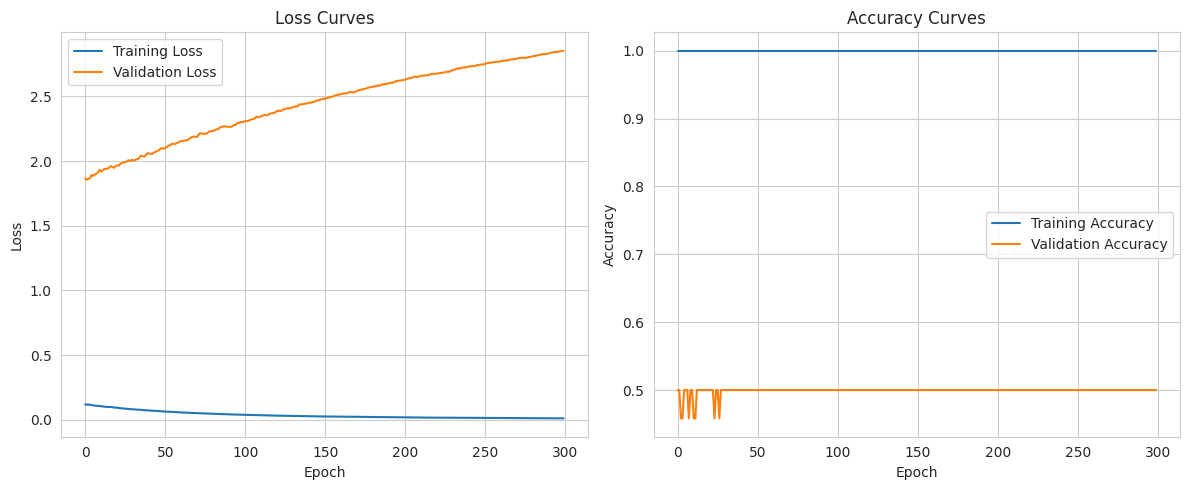

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

# Fit the model and capture the training history
history = keras_model.fit(preprocessor(X_train), y_train_ohe,
                           batch_size=20,
                           epochs=300,
                           validation_split=0.25,
                           verbose=0)  # Set verbose=0 to reduce output during training

# Plot training and validation curves
plt.figure(figsize=(12, 5))

# Plot Loss Curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#-- Generate predicted y values

# Predict probabilities for each class on the preprocessed test set
pred_probabilities = keras_model.predict(preprocessor(X_test))

#Note: Keras predict returns the predicted column index location for classification models
# Predict
prediction_column_index= np.argmax(pred_probabilities, axis=-1)

# Assuming y_train is a Pandas Series, convert it to a categorical type to extract class labels.
class_labels = y_train.astype('category').cat.categories

# extract correct prediction labels
prediction_labels = [class_labels[i] for i in prediction_column_index]

# Convert y_test to categorical labels for evaluation.
true_labels = y_test.astype('category')

## Write code to show model performance by comparing prediction_labels with true labels
print("Accuracy:", accuracy_score(true_labels, prediction_labels))
print("\nClassification Report:")
print(classification_report(true_labels, prediction_labels))
print("Confusion Matrix:")
print(confusion_matrix(true_labels, prediction_labels))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step 
Accuracy: 0.5714285714285714

Classification Report:
              precision    recall  f1-score   support

     Average       0.62      0.62      0.62         8
        High       0.50      0.38      0.43         8
         Low       0.45      0.62      0.53         8
   Very High       0.78      0.78      0.78         9
    Very Low       0.50      0.44      0.47         9

    accuracy                           0.57        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.57      0.57      0.57        42

Confusion Matrix:
[[5 1 1 0 1]
 [3 3 0 2 0]
 [0 0 5 0 3]
 [0 2 0 7 0]
 [0 0 5 0 4]]


Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
# Your code here:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Count features in input data
feature_count = preprocessor(X_train).shape[1]

# Define the regularized Neural Network Model with Dropout and Batch Normalization
model_reg = Sequential()
# First hidden layer
model_reg.add(Dense(128, input_dim=feature_count, activation='relu'))
model_reg.add(BatchNormalization())
model_reg.add(Dropout(0.3))  # Dropout with 30% rate

# Second hidden layer
model_reg.add(Dense(64, activation='relu'))
model_reg.add(BatchNormalization())
model_reg.add(Dropout(0.3))

# Third hidden layer
model_reg.add(Dense(64, activation='relu'))
model_reg.add(BatchNormalization())
model_reg.add(Dropout(0.3))

# Fourth hidden layer
model_reg.add(Dense(32, activation='relu'))
model_reg.add(BatchNormalization())
model_reg.add(Dropout(0.3))

# Output layer: 5 neurons for 5 classes using softmax activation
model_reg.add(Dense(5, activation='softmax'))

# Compile the model using categorical crossentropy and Adam optimizer
model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert y_train to one-hot encoding for Keras
y_train_labels = y_train.astype('category').cat.codes
y_train_ohe = to_categorical(y_train_labels, num_classes=5)

# Fit the model and capture the training history
history_reg = model_reg.fit(preprocessor(X_train), y_train_ohe,
                            batch_size=20,
                            epochs=300,
                            validation_split=0.25,
                            verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step - accuracy: 0.1563 - loss: 2.4713 - val_accuracy: 0.2500 - val_loss: 1.6004
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.4054 - loss: 1.7441 - val_accuracy: 0.2500 - val_loss: 1.6047
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.2677 - loss: 1.9376 - val_accuracy: 0.2917 - val_loss: 1.6073
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.2504 - loss: 1.9020 - val_accuracy: 0.2083 - val_loss: 1.6069
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.3642 - loss: 1.9057 - val_accuracy: 0.0833 - val_loss: 1.6021
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.2933 - loss: 1.8130 - val_accuracy: 0.2083 - val_loss: 1.5987
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.4615 - loss: 1.3428 - val_accuracy: 0.1667 - val_loss: 1.5869
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.3488 - loss: 1.7868 - val_accuracy: 0.1667 - v

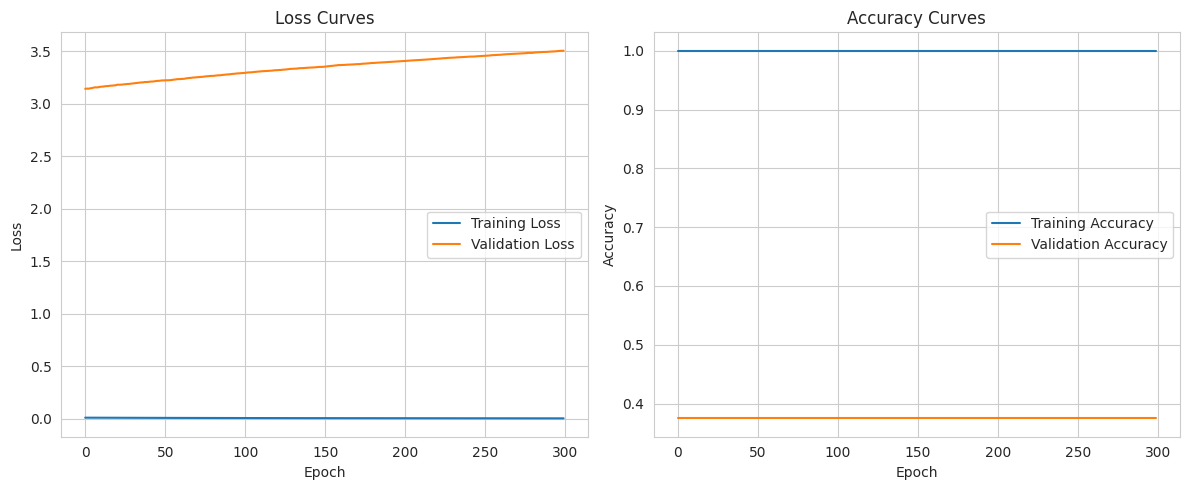

In [ ]:
# Fit the model and capture the training history in history_reg
history_reg = keras_model.fit(preprocessor(X_train), y_train_ohe,
                              batch_size=20,
                              epochs=300,
                              validation_split=0.25,
                              verbose=0)  # Set verbose=0 to reduce output during training

# Plot training and validation curves in two subplots
plt.figure(figsize=(12, 5))

# Plot Loss Curves
plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Your comments about the change in performance

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [ ]:
# Model using ReLU activation (baseline)
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Count features in input data
feature_count = preprocessor(X_train).shape[1]

# Build the model
relu_model = Sequential()
relu_model.add(Dense(128, input_dim=feature_count, activation='relu'))
relu_model.add(Dense(64, activation='relu'))
relu_model.add(Dense(64, activation='relu'))
relu_model.add(Dense(32, activation='relu'))
relu_model.add(Dense(5, activation='softmax'))  # 5 neurons for 5 classes

# Compile the model
relu_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert y_train to one-hot encoding
y_train_labels = y_train.astype('category').cat.codes
y_train_ohe = to_categorical(y_train_labels, num_classes=5)

# Train the model
history_relu = relu_model.fit(preprocessor(X_train), y_train_ohe,
                              batch_size=20,
                              epochs=300,
                              validation_split=0.25,
                              verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model using LeakyReLU activation
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU

leaky_model = Sequential()
leaky_model.add(Dense(128, input_dim=feature_count))
leaky_model.add(LeakyReLU(alpha=0.1))
leaky_model.add(Dense(64))
leaky_model.add(LeakyReLU(alpha=0.1))
leaky_model.add(Dense(64))
leaky_model.add(LeakyReLU(alpha=0.1))
leaky_model.add(Dense(32))
leaky_model.add(LeakyReLU(alpha=0.1))
leaky_model.add(Dense(5, activation='softmax'))

leaky_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_leaky = leaky_model.fit(preprocessor(X_train), y_train_ohe,
                                batch_size=20,
                                epochs=300,
                                validation_split=0.25,
                                verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Model using Tanh activation
from keras.models import Sequential
from keras.layers import Dense

tanh_model = Sequential()
tanh_model.add(Dense(128, input_dim=feature_count, activation='tanh'))
tanh_model.add(Dense(64, activation='tanh'))
tanh_model.add(Dense(64, activation='tanh'))
tanh_model.add(Dense(32, activation='tanh'))
tanh_model.add(Dense(5, activation='softmax'))

tanh_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_tanh = tanh_model.fit(preprocessor(X_train), y_train_ohe,
                              batch_size=20,
                              epochs=300,
                              validation_split=0.25,
                              verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model using Sigmoid activation
from keras.models import Sequential
from keras.layers import Dense

sigmoid_model = Sequential()
sigmoid_model.add(Dense(128, input_dim=feature_count, activation='sigmoid'))
sigmoid_model.add(Dense(64, activation='sigmoid'))
sigmoid_model.add(Dense(64, activation='sigmoid'))
sigmoid_model.add(Dense(32, activation='sigmoid'))
sigmoid_model.add(Dense(5, activation='softmax'))

sigmoid_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_sigmoid = sigmoid_model.fit(preprocessor(X_train), y_train_ohe,
                                    batch_size=20,
                                    epochs=300,
                                    validation_split=0.25,
                                    verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


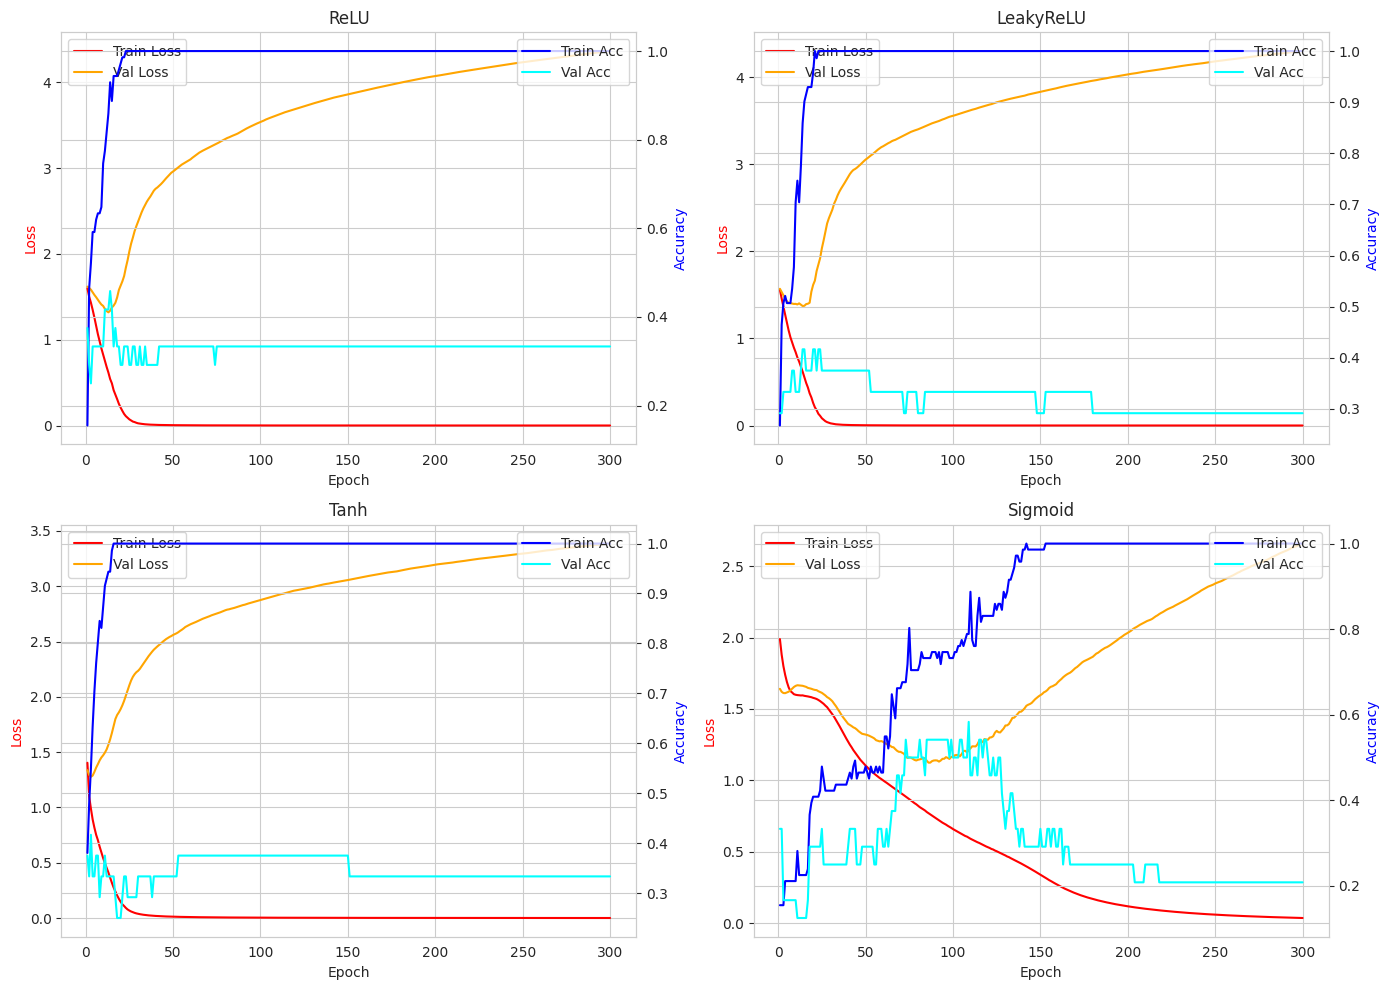

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_relu.history['loss']) + 1)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# ReLU subplot
ax = axs[0, 0]
ax.plot(epochs, history_relu.history['loss'], label='Train Loss', color='red')
ax.plot(epochs, history_relu.history['val_loss'], label='Val Loss', color='orange')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss', color='red')
ax2 = ax.twinx()
ax2.plot(epochs, history_relu.history['accuracy'], label='Train Acc', color='blue')
ax2.plot(epochs, history_relu.history['val_accuracy'], label='Val Acc', color='cyan')
ax2.set_ylabel('Accuracy', color='blue')
ax.set_title('ReLU')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# LeakyReLU subplot
ax = axs[0, 1]
ax.plot(epochs, history_leaky.history['loss'], label='Train Loss', color='red')
ax.plot(epochs, history_leaky.history['val_loss'], label='Val Loss', color='orange')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss', color='red')
ax2 = ax.twinx()
ax2.plot(epochs, history_leaky.history['accuracy'], label='Train Acc', color='blue')
ax2.plot(epochs, history_leaky.history['val_accuracy'], label='Val Acc', color='cyan')
ax2.set_ylabel('Accuracy', color='blue')
ax.set_title('LeakyReLU')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Tanh subplot
ax = axs[1, 0]
ax.plot(epochs, history_tanh.history['loss'], label='Train Loss', color='red')
ax.plot(epochs, history_tanh.history['val_loss'], label='Val Loss', color='orange')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss', color='red')
ax2 = ax.twinx()
ax2.plot(epochs, history_tanh.history['accuracy'], label='Train Acc', color='blue')
ax2.plot(epochs, history_tanh.history['val_accuracy'], label='Val Acc', color='cyan')
ax2.set_ylabel('Accuracy', color='blue')
ax.set_title('Tanh')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Sigmoid subplot
ax = axs[1, 1]
ax.plot(epochs, history_sigmoid.history['loss'], label='Train Loss', color='red')
ax.plot(epochs, history_sigmoid.history['val_loss'], label='Val Loss', color='orange')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss', color='red')
ax2 = ax.twinx()
ax2.plot(epochs, history_sigmoid.history['accuracy'], label='Train Acc', color='blue')
ax2.plot(epochs, history_sigmoid.history['val_accuracy'], label='Val Acc', color='cyan')
ax2.set_ylabel('Accuracy', color='blue')
ax.set_title('Sigmoid')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


<Figure size 1000x600 with 0 Axes>

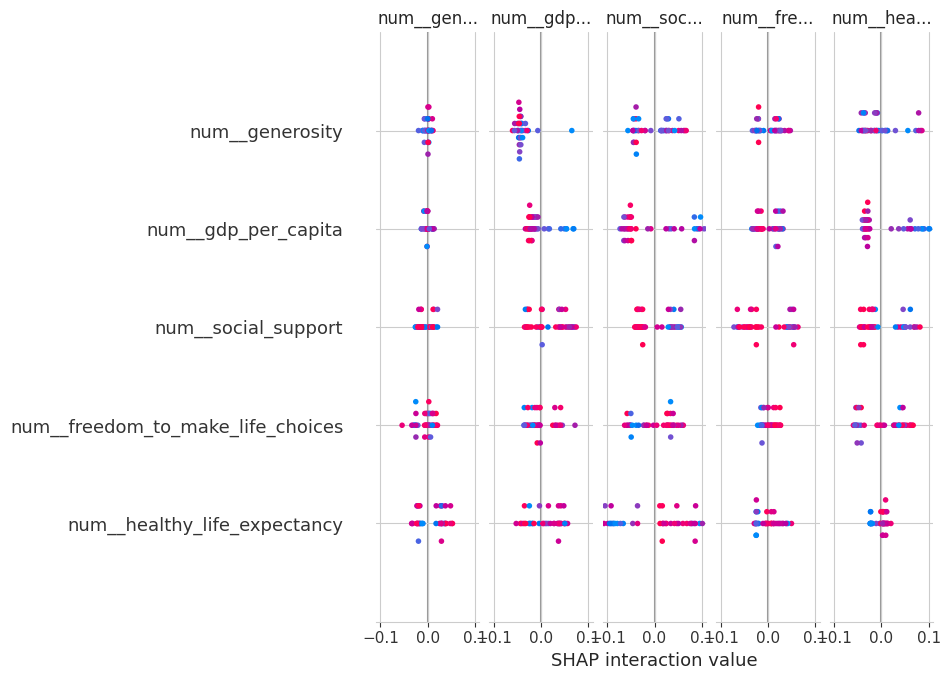

<Figure size 1000x600 with 0 Axes>

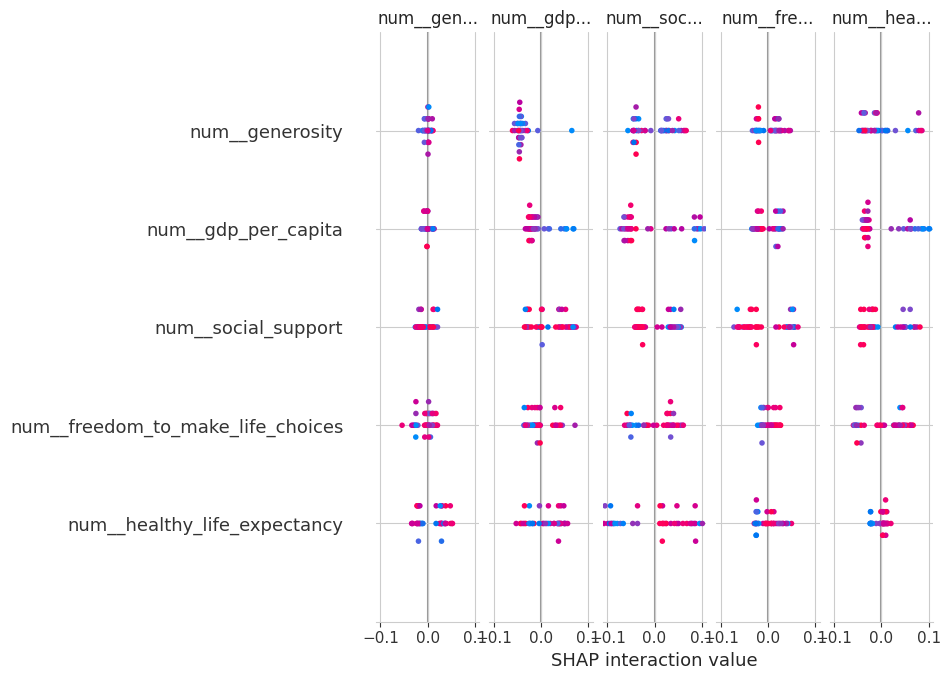

In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Ensure SHAP works with RandomForestClassifier
explainer = shap.TreeExplainer(model_2)

# Transform X_test using preprocessor to ensure it's fully numeric
X_test_sample = np.array(preprocess.transform(X_test).toarray(), dtype=np.float64)[:100]

# Get the correct feature names from the preprocessor if possible
if hasattr(preprocess, 'get_feature_names_out'):
    feature_names = preprocess.get_feature_names_out()
else:
    # If can't get feature names from preprocessor, create generic names
    feature_names = [f"feature_{i}" for i in range(X_test_sample.shape[1])]

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Plot SHAP summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names)

# Plot SHAP bar chart for feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", feature_names=feature_names)


<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

  0%|          | 0/42 [00:00<?, ?it/s]

<Figure size 1000x600 with 0 Axes>

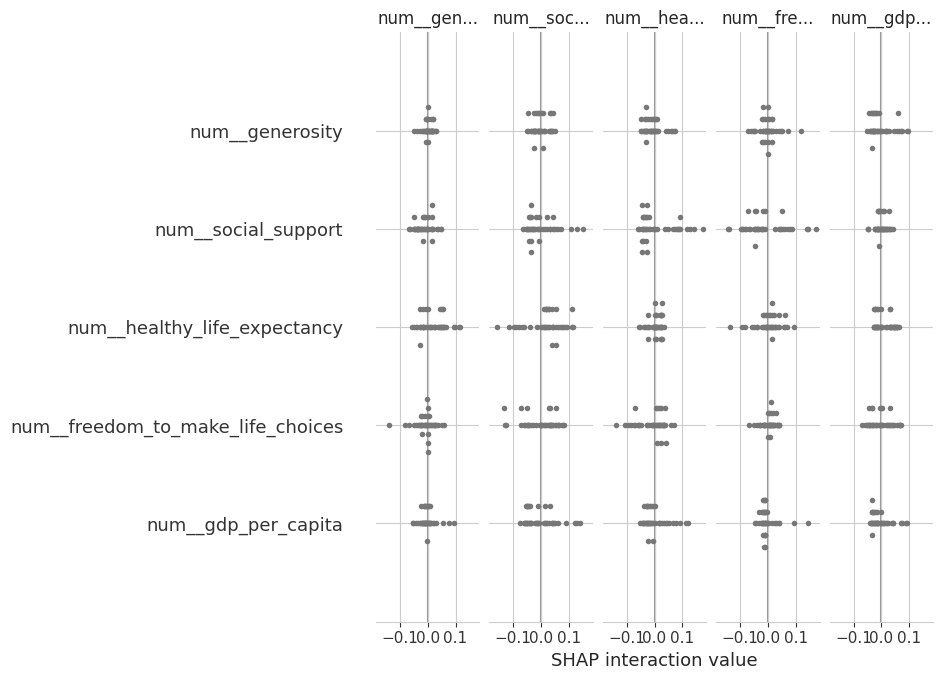

<Figure size 1000x600 with 0 Axes>

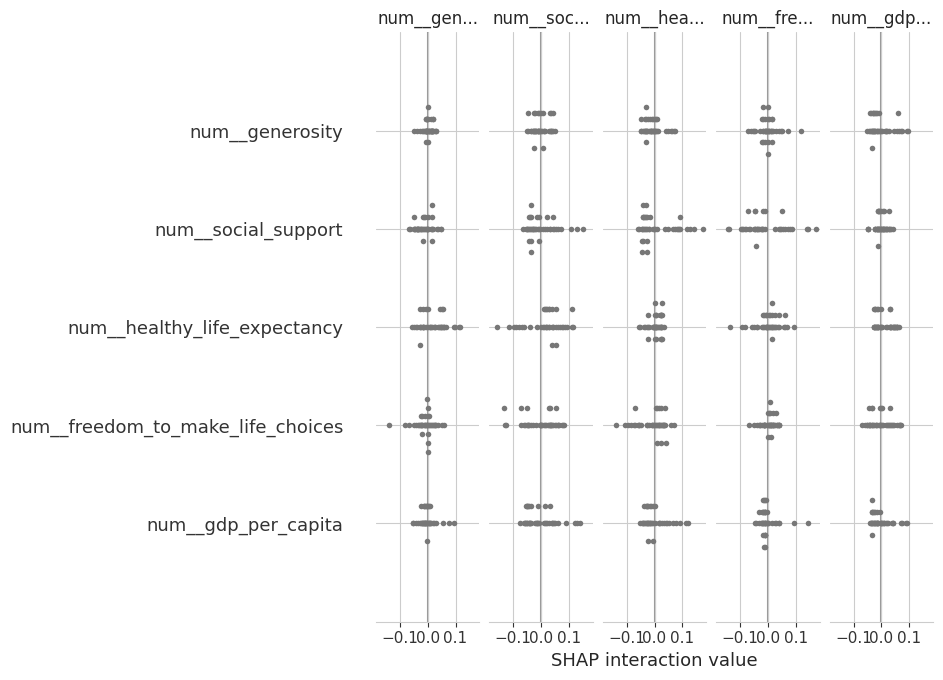

In [ ]:
# Try model_4


# Ensure SHAP works with KNeighborsClassifier
X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)

# Use KernelExplainer for non-tree models
explainer = shap.KernelExplainer(model_4.predict_proba, X_train_transformed[:100])

# Compute SHAP values on a subset of test data
X_test_sample = X_test_transformed[:100]
shap_values = explainer.shap_values(X_test_sample)

# Plot SHAP summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names)

# Plot SHAP bar chart for feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", feature_names=feature_names)

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
## The SHAP analysis helps in understanding the contribution of each feature and their interactions in the model’s predictions, it is easy to integrate and provides intuitive visualizations for technical audiences.
## However, it can be computationally complex for large datasets and complex models.

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked